In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode

In [3]:
card_details = pd.read_csv('Card Details.csv')

In [4]:
customer_details = pd.read_csv('Customer Details.csv',encoding='windows-1252')

In [5]:
df = customer_details.merge(card_details,on='CustomerID')

In [6]:
df

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


# Conduct comprehensive exploratory data analysis (EDA) to gain deep insights into the dataset.


In [7]:
df.isnull().sum()

Name              0
CustomerID        0
Age               0
Marital Status    0
Gender            0
Ethnicity         0
Education         0
Income            0
Limit             0
Rating            0
Cards             0
Balance           0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32547 entries, 0 to 32546
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            32547 non-null  object 
 1   CustomerID      32547 non-null  object 
 2   Age             32547 non-null  int64  
 3   Marital Status  32547 non-null  object 
 4   Gender          32547 non-null  object 
 5   Ethnicity       32547 non-null  object 
 6   Education       32547 non-null  object 
 7   Income          32547 non-null  float64
 8   Limit           32547 non-null  int64  
 9   Rating          32547 non-null  int64  
 10  Cards           32547 non-null  int64  
 11  Balance         32547 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 3.2+ MB


In [9]:
df.duplicated().sum()

0

# Utilize descriptive statistics to understand the dataset's key features and distributions.


In [10]:
df.describe()

,Age,Income,Limit,Rating,Cards,Balance
count,32547.000000,32547.000000,32547.000000,32547.000000,32547.000000,32547.000000
mean,55.476419,46.490372,4419.522322,326.720159,2.906658,447.894706
std,16.990896,37.140511,2202.441042,136.146945,1.325485,454.205934
min,25.000000,10.627000,1134.000000,119.000000,1.000000,0.000000
25%,42.000000,20.661500,2727.000000,224.000000,2.000000,5.000000
50%,55.000000,33.469000,4178.000000,316.000000,3.000000,331.000000
75%,69.000000,58.075000,5636.000000,405.000000,4.000000,749.000000
max,86.000000,160.231000,11200.000000,805.000000,7.000000,1597.000000


# Create insightful visualizations, including histograms, box plots, and scatter plots, to identify trends and anomalies.


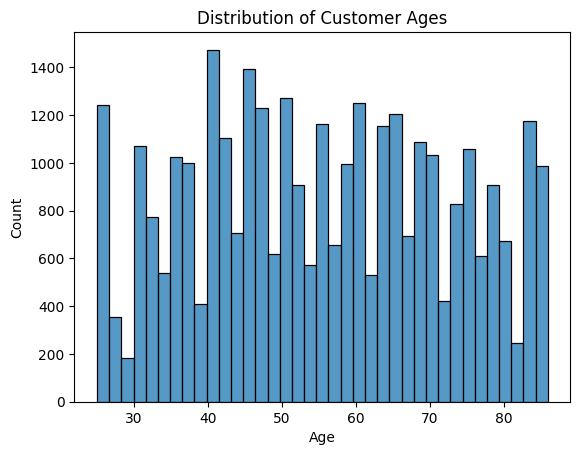

In [11]:
# Histogram
sns.histplot(df["Age"])
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Customer Ages")
plt.show()

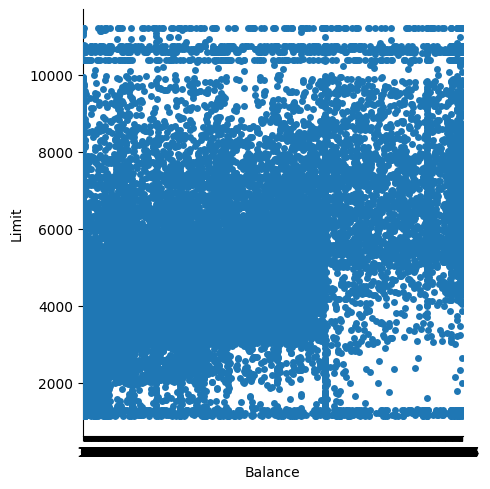

In [12]:
# Box Plot
sns.catplot(x='Balance',y='Limit',data=df)
plt.show()

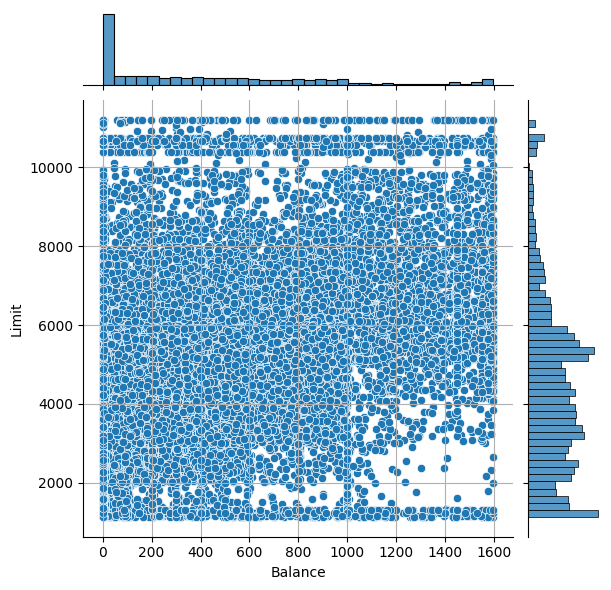

In [13]:
sns.jointplot(x='Balance',y='Limit',data=df)
plt.grid()
plt.show()

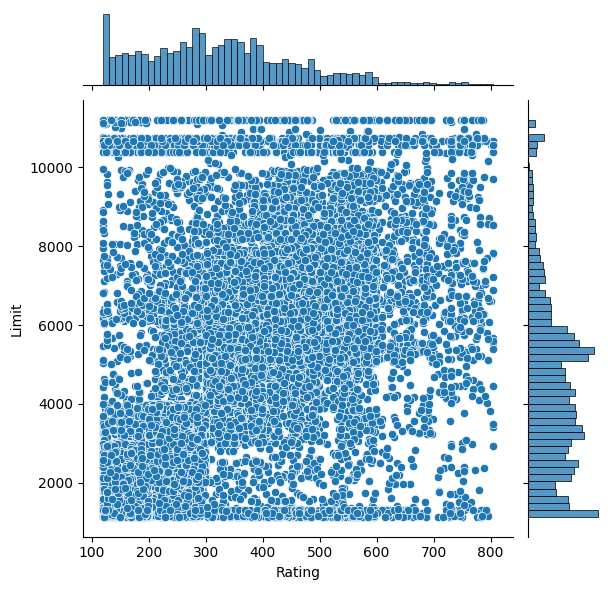

In [14]:
sns.jointplot(x='Rating',y='Limit',data=df)
plt.show()

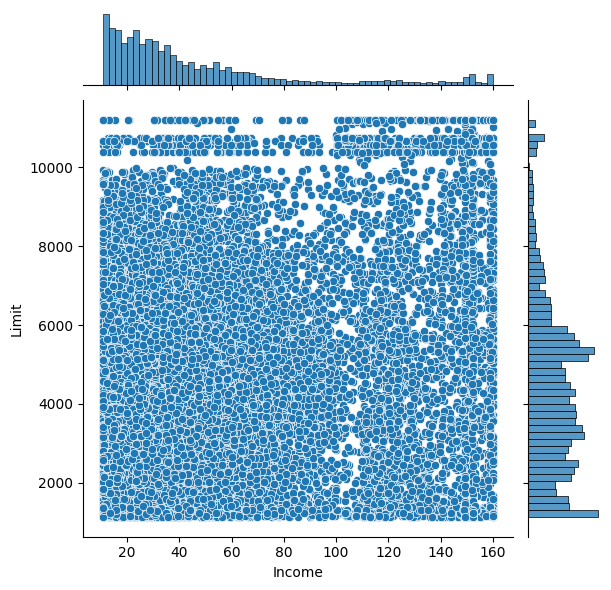

In [15]:
sns.jointplot(x='Income',y='Limit',data=df)
plt.show()

# Analyze categorical features using pie charts and bar plots to understand their distributions.


In [16]:
ethnicity = df.groupby('Ethnicity')['Name'].count()
ethnicity = ethnicity.to_frame()
ethnicity = ethnicity.reset_index()
ethnicity.columns = ('Ethnicity','Count')
ethnicity

,Ethnicity,Count
0,African American,7927
1,Asian,8240
2,Caucasian,16380


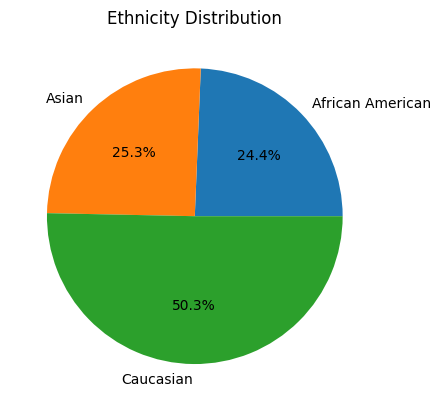

In [17]:
plt.pie(ethnicity['Count'],labels=ethnicity['Ethnicity'],autopct='%1.1f%%')
plt.title('Ethnicity Distribution')
plt.show()

In [18]:
education = df.groupby('Education')['Name'].count()
education = education.to_frame()
education = education.reset_index()
education.columns = ('Education','Count')
education

,Education,Count
0,Bachelor,7342
1,Doctorate,2610
2,Elementary,3793
3,High School,465
4,Master,8781
5,Secondary,1733
6,Senior High School,2553
7,Senior Secondary,5270


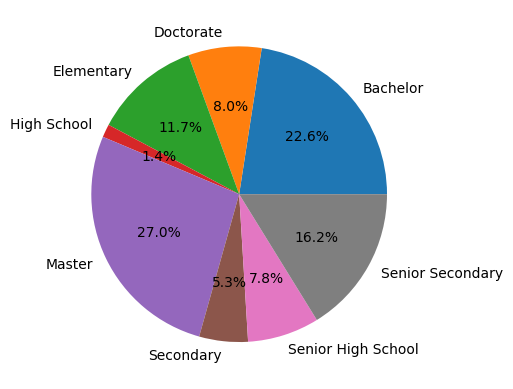

In [19]:
x = education['Education']
y = education['Count']

plt.pie(y,labels=x,autopct='%1.1f%%')
plt.show()

In [20]:
marital_status = df['Marital Status'].value_counts().reset_index()
marital_status.columns = ('Marital Status','Count')
marital_status = marital_status.sort_values(by='Marital Status')
marital_status

,Marital Status,Count
2,Divorced,51
1,Married,15621
3,Seperated,37
0,Unmarried,16829
4,Widow,9


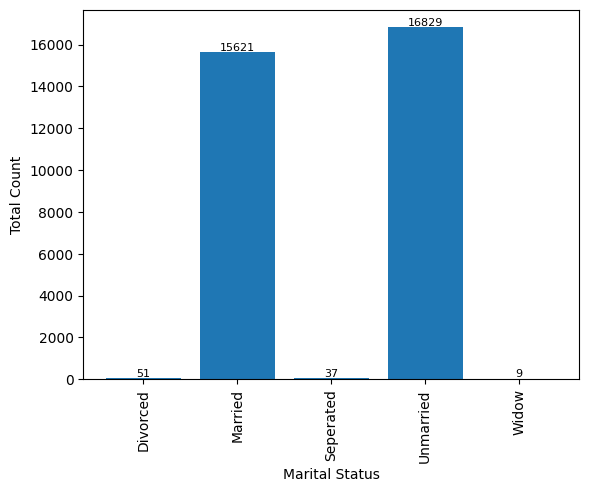

In [21]:
x = marital_status['Marital Status']
y = marital_status['Count']

plt.bar(x,y)
plt.xlabel('Marital Status')
plt.ylabel('Total Count')
plt.xticks(rotation = 'vertical')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha = 'center',va = 'bottom',fontsize=8)
plt.show()

In [22]:
gender = df['Gender'].value_counts().reset_index()
gender.columns = ('Gender','Count')
gender

,Gender,Count
0,Female,16562
1,Male,15985


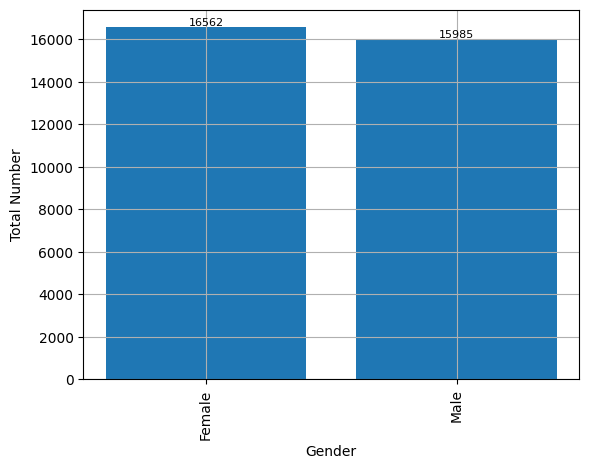

In [23]:
x = gender['Gender']
y = gender['Count']

plt.bar(x,y)
plt.xlabel('Gender')
plt.ylabel('Total Number')
plt.xticks(rotation = 'vertical')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.grid()
plt.show()

# Identify outliers and patterns in the data using appropriate statistical methods.

In [24]:
def outliers (data,series):
    q1,q3 = np.percentile(data[series],[25,75])
    iqr = q3-q1
    lower_extreme = q1-1.5*iqr
    upper_extreme = q3+1.5*iqr
    print(f'Lower Extreme : {lower_extreme}')
    print(f'Upper Extreme : {upper_extreme}')
    ndf = df.loc[(data[series]>lower_extreme) & (data[series]<upper_extreme)]
    return ndf

In [25]:
ndf = outliers(df,'Income')
ndf

Lower Extreme : -35.458749999999995
Upper Extreme : 114.19525


,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


In [26]:
df = ndf
ndf = outliers(df,'Balance')
ndf

Lower Extreme : -1064.5
Upper Extreme : 1779.5


,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
0,Katherine Bettcher,0002-ORFBO,30,Married,Male,Caucasian,Master,105.038,9142,734,3,232
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


In [27]:
df = ndf
ndf = outliers(df,'Rating')
ndf

Lower Extreme : -36.0
Upper Extreme : 652.0


,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
1,Alejandro Graham,0002-ORFBOA,71,Married,Male,Asian,Bachelor,69.820,4223,389,1,924
2,Priscilla Ian,0002-ORFBOC,46,Seperated,Male,African American,Senior Secondary,17.441,2430,253,1,20
3,Ovella,0002-ORFBOCH,42,Married,Female,Caucasian,Senior Secondary,39.368,3829,248,3,813
4,Juliann,0002-ORFBOH,30,Married,Male,African American,Doctorate,56.375,2850,258,1,109
5,Olaf,0002-ORFBOW,52,Unmarried,Female,Caucasian,Elementary,53.016,6136,574,2,438
...,...,...,...,...,...,...,...,...,...,...,...,...
32542,Oletta,9992-UJOELH,34,Unmarried,Male,Caucasian,Bachelor,32.930,4222,308,4,162
32543,Leesa Hugo,9993-LHIEB,61,Married,Female,Caucasian,Senior High School,12.469,5645,311,2,487
32544,Oliva,9993-LHIEBH,64,Unmarried,Male,Caucasian,Senior Secondary,64.167,3116,285,3,576
32545,Hank Hunter,9995-HOTOH,77,Unmarried,Female,Caucasian,Bachelor,20.970,1356,161,2,0


In [28]:
df = ndf

# Perform hypothesis testing to validate assumptions and test correlations between variables.


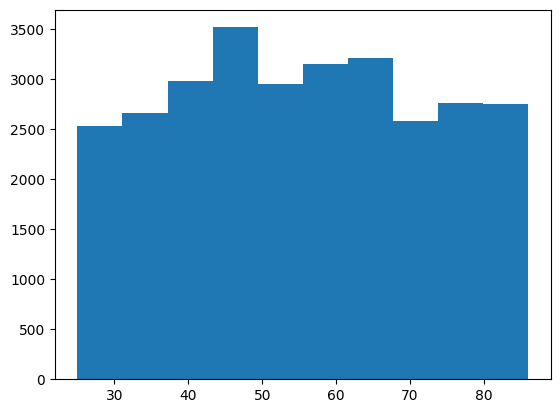

In [29]:
plt.hist(df['Age'])
plt.show()
# In the following test it is clearly visible that age is not equaly distributed.

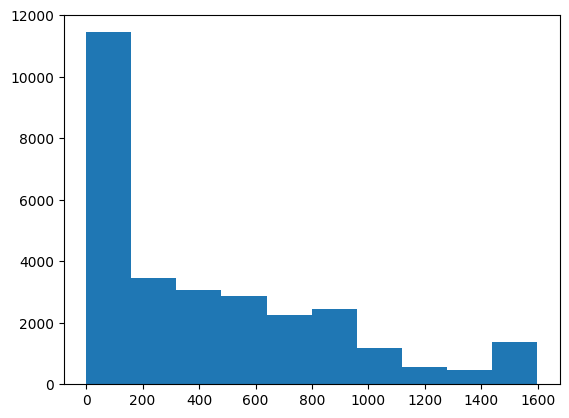

In [30]:
plt.hist(df['Balance'])
plt.show()

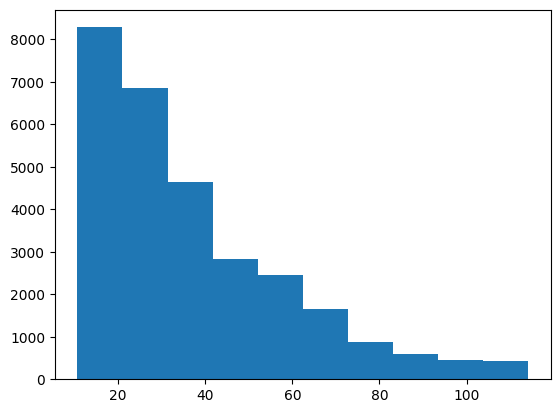

In [31]:
plt.hist(df['Income'])
plt.show()

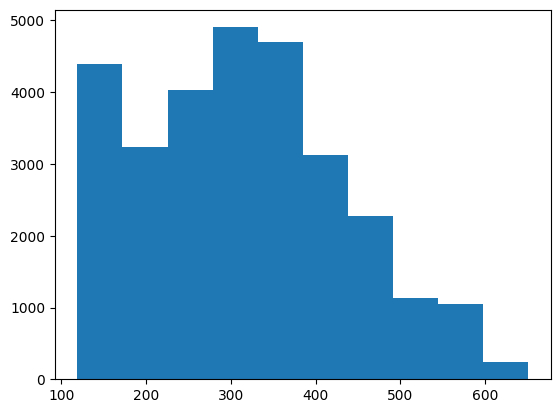

In [32]:
plt.hist(df['Rating'])
plt.show()

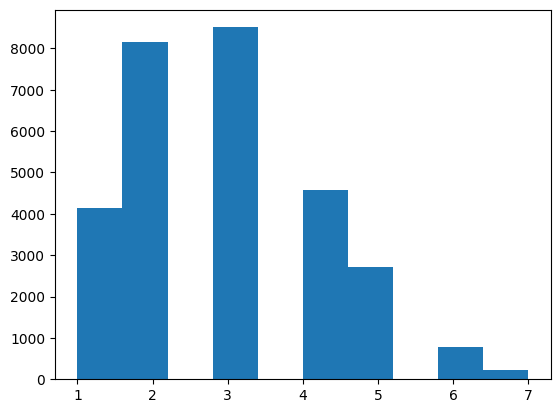

In [33]:
plt.hist(df['Cards'])
plt.show()

# Conduct correlation analysis to identify the relationships between numerical variables.


C:\Users\HP\AppData\Local\Temp\ipykernel_1580\2271070662.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


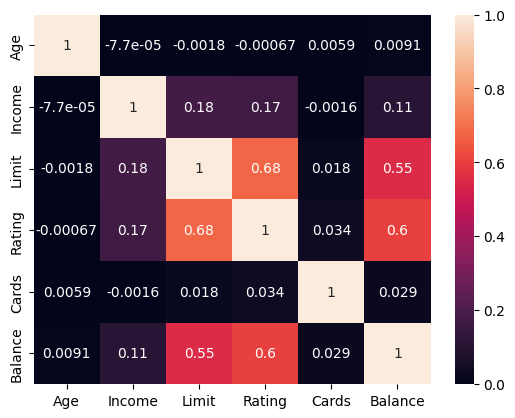

In [34]:
sns.heatmap(df.corr(),annot=True)
plt.show()

# Utilize inferential statistical methods, such as t-tests to compare groups and analyze differences.


In [35]:
from scipy.stats import ttest_ind
ttest_age = ttest_ind(df['Limit'],df['Age'])
ttest_income = ttest_ind(df['Limit'],df['Income'])
ttest_rating = ttest_ind(df['Limit'],df['Rating'])
ttest_cards = ttest_ind(df['Limit'],df['Cards'])
ttest_balance = ttest_ind(df['Limit'],df['Balance'])
print(ttest_age)
print(ttest_income)
print(ttest_rating)
print(ttest_cards)
print(ttest_balance)

Ttest_indResult(statistic=357.8423400203006, pvalue=0.0)
Ttest_indResult(statistic=359.43895213347315, pvalue=0.0)
Ttest_indResult(statistic=335.2550459320579, pvalue=0.0)
Ttest_indResult(statistic=362.3442509270046, pvalue=0.0)
Ttest_indResult(statistic=319.05998850634074, pvalue=0.0)


The t-statistic represents the difference between the means of the two groups relative to the variation within the groups. 

The p-value is the probability of observing a t-statistic as extreme as the one calculated if the null hypothesis (no difference between the groups) is true.

# Apply chi-square tests to analyze associations between categorical variables.


# Calculate measures of central tendency (mean, median, mode) and dispersion (variance, standard deviation) for relevant variables.


In [36]:
import statistics

In [37]:
age_mean = np.mean(df['Age'])
print(f'Mean of Age : {round(age_mean,2)}')
age_mode = statistics.mode(df['Age'])
print(f'Mode of Age : {round(age_mode,2)}')
age_median = np.median(df['Age'])
print(f'Median of Age : {round(age_median,2)}')
age_variance = np.var(df['Age'])
print(f'Variance of Age : {round(age_variance,2)}')
age_standard_deviation = np.std(df['Age'])
print(f'Standard Deviation of Age : {round(age_standard_deviation,2)}')

Mean of Age : 55.52
Mode of Age : 25
Median of Age : 55.0
Variance of Age : 288.66
Standard Deviation of Age : 16.99


In [38]:
income_mean = np.mean(df['Income'])
print(f'Mean of Income : {round(income_mean,2)}')
income_mode = statistics.mode(df['Income'])
print(f'Mode of Income : {round(income_mode,2)}')
income_median = np.median(df['Income'])
print(f'Median of Income : {round(income_median,2)}')
income_variance = np.var(df['Income'])
print(f'Variance of Income : {round(income_variance,2)}')
income_standard_deviation = np.std(df['Income'])
print(f'Standard Deviation of Income : {round(income_standard_deviation,2)}')

Mean of Income : 36.69
Mode of Income : 10.73
Median of Income : 30.31
Variance of Income : 505.26
Standard Deviation of Income : 22.48


In [39]:
limit_mean = np.mean(df['Limit'])
print(f'Mean of Limit : {round(limit_mean,2)}')
limit_mode = statistics.mode(df['Limit'])
print(f'Mode of Limit : {round(limit_mode,2)}')
limit_median = np.median(df['Limit'])
print(f'Median of Limit : {round(limit_median,2)}')
limit_variance = np.var(df['Limit'])
print(f'Variance of Limit : {round(limit_variance,2)}')
limit_standard_deviation = np.std(df['Limit'])
print(f'Standard Deviation of Limit : {round(limit_standard_deviation,2)}')

Mean of Limit : 4251.23
Mode of Limit : 1300
Median of Limit : 4091.0
Variance of Limit : 3998615.55
Standard Deviation of Limit : 1999.65


In [40]:
balance_mean = np.mean(df['Balance'])
print(f'Mean of Balance : {round(balance_mean,2)}')
balance_mode = statistics.mode(df['Balance'])
print(f'Mode of Balance : {round(balance_mode,2)}')
balance_median = np.median(df['Balance'])
print(f'Median of Balance : {round(balance_median,2)}')
balance_variance = np.var(df['Balance'])
print(f'Variance of Balance : {round(balance_variance,2)}')
balance_standard_deviation = np.mean(df['Balance'])
print(f'Standard Deviation of Balance : {round(balance_standard_deviation,2)}')

Mean of Balance : 422.22
Mode of Balance : 0
Median of Balance : 303.0
Variance of Balance : 190691.68
Standard Deviation of Balance : 422.22


In [41]:
cards_mean = np.mean(df['Cards'])
print(f'Mean of Cards : {round(cards_mean,2)}')
cards_mode = statistics.mode(df['Cards'])
print(f'Mode of Cards : {round(cards_mode,2)}')
cards_median = np.median(df['Cards'])
print(f'Median of Cards : {round(cards_median,2)}')
cards_variance = np.var(df['Cards'])
print(f'Variance of Cards : {round(cards_variance,2)}')
cards_standard_deviation = np.std(df['Cards'])
print(f'Standard Deviation of Cards : {round(cards_standard_deviation,2)}')

Mean of Cards : 2.89
Mode of Cards : 3
Median of Cards : 3.0
Variance of Cards : 1.74
Standard Deviation of Cards : 1.32


# Apply data transformation techniques (e.g., logarithmic transformation) to normalize skewed variables.


In [42]:
import numpy as np
ndf = df[['Age','Income','Balance','Limit']]

In [43]:
# Logarithmic Transformation
logarithmic_transformation = np.log(ndf)
logarithmic_transformation

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


,Age,Income,Balance,Limit
1,4.262680,4.245921,6.828712,8.348301
2,3.828641,2.858824,2.995732,7.795647
3,3.737670,3.672953,6.700731,8.250359
4,3.401197,4.032026,4.691348,7.955074
5,3.951244,3.970594,6.082219,8.721928
...,...,...,...,...
32542,3.526361,3.494384,5.087596,8.348064
32543,4.110874,2.523246,6.188264,8.638525
32544,4.158883,4.161489,6.356108,8.044305
32545,4.343805,3.043093,-inf,7.212294


Logarithmic transformation can help reduce the right skewness in data.

Logarithmic transformation is suitable for positive data; it may not be appropriate for data containing zero or negative values.

In [44]:
sqrt_transformation = np.sqrt(ndf)
sqrt_transformation

,Age,Income,Balance,Limit
1,8.426150,8.355836,30.397368,64.984614
2,6.782330,4.176242,4.472136,49.295030
3,6.480741,6.274392,28.513155,61.878914
4,5.477226,7.508329,10.440307,53.385391
5,7.211103,7.281209,20.928450,78.332624
...,...,...,...,...
32542,5.830952,5.738467,12.727922,64.976919
32543,7.810250,3.531147,22.068076,75.133215
32544,8.000000,8.010431,24.000000,55.821143
32545,8.774964,4.579301,0.000000,36.823905


The square root transformation is another option to reduce right skewness.

Square root transformation is suitable for positive data.

# Analyze the distribution of gender, ethnicity, education level, and marital status among the individuals.


In [45]:
Gender = df['Gender'].value_counts().reset_index()
Gender.columns = ('Gender','Count')
Gender

,Gender,Count
0,Female,14784
1,Male,14305


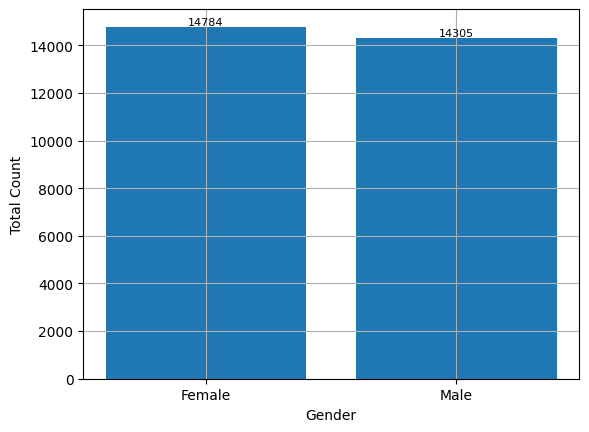

In [46]:
x = Gender['Gender']
y = Gender['Count']
plt.bar(x,y)
plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.grid()
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize=8)
plt.show()

In [47]:
Ethnicity = df['Ethnicity'].value_counts().reset_index()
Ethnicity.columns = ('Ethnicity','Count')
Ethnicity

,Ethnicity,Count
0,Caucasian,14683
1,Asian,7349
2,African American,7057


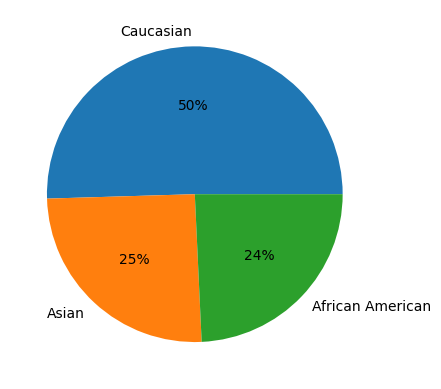

In [48]:
plt.pie(Ethnicity['Count'],labels=Ethnicity['Ethnicity'],autopct='%1.f%%')
plt.show()

In [49]:
Education = df['Education'].value_counts().reset_index()
Education.columns = ('Education','Count')
Education

,Education,Count
0,Master,7863
1,Bachelor,6527
2,Senior Secondary,4678
3,Elementary,3391
4,Doctorate,2356
5,Senior High School,2292
6,Secondary,1567
7,High School,415


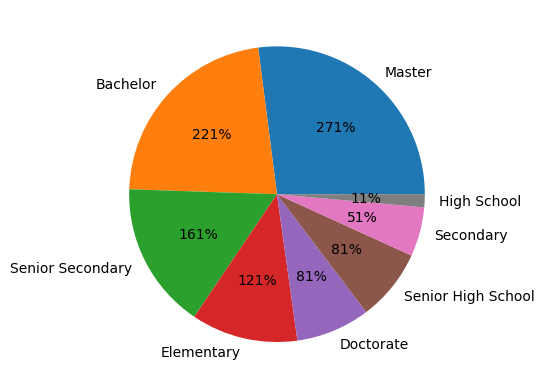

In [50]:
plt.pie(Education['Count'],labels=Education['Education'],autopct='%1.f1%%')
plt.show()

In [51]:
Marital_Status = df['Marital Status'].value_counts().reset_index()
Marital_Status.columns = ('Marital Status','Count')
Marital_Status

,Marital Status,Count
0,Unmarried,15081
1,Married,13919
2,Divorced,49
3,Seperated,33
4,Widow,7


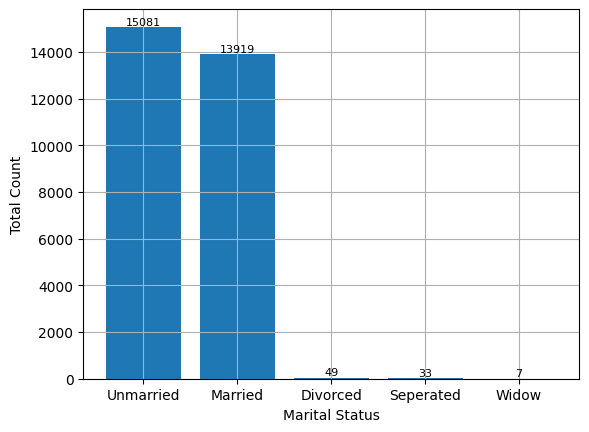

In [52]:
x = Marital_Status['Marital Status']
y = Marital_Status['Count']
plt.bar(x,y)
plt.xlabel('Marital Status')
plt.ylabel('Total Count')
for i in range(len(x)):
    plt.text(x[i],y[i],f'{y[i]}',ha='center',va='bottom',fontsize = 8)
plt.grid()
plt.show()

# Determine the percentage of students among the individuals and assess their credit ratings and credit limits.


# Explore the relationship between income and credit limit using correlation and regression analysis.


In [53]:
income_limit = df['Income'].corr(df['Limit'])
(f'Correlation Between Income and Limit : {round(income_limit*100,2)}%')

'Correlation Between Income and Limit : 17.64%'

# Assess the impact of education level on credit limits by comparing different groups.


In [54]:
education_groups = df.groupby('Education')['Limit'].count()

In [55]:
education_groups

Education
Bachelor              6527
Doctorate             2356
Elementary            3391
High School            415
Master                7863
Secondary             1567
Senior High School    2292
Senior Secondary      4678
Name: Limit, dtype: int64

# Calculate the average number of cards owned by individuals and analyze its relationship with credit limits.


In [56]:
average_cards = df['Cards'].mean()
(f'Average Number of Cards : {round(average_cards,2)}')

'Average Number of Cards : 2.89'

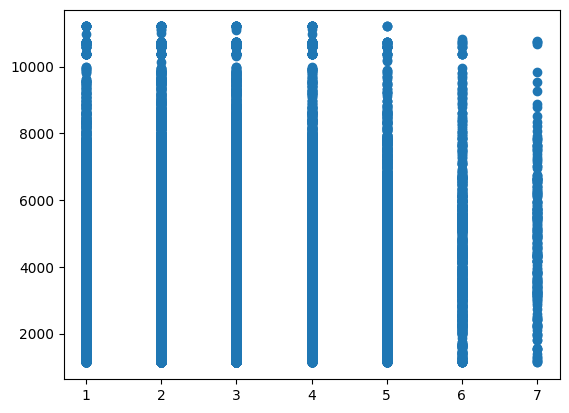

In [57]:
plt.scatter(df['Cards'],df['Limit'])
plt.show()

In [58]:
card_limit = df['Cards'].corr(df['Limit'])
(f'Correlation between Number of Cards and Limit : {round(card_limit,2)}')

'Correlation between Number of Cards and Limit : 0.02'

# Evaluate the distribution of account balances and identify individuals with high or low balances.


In [59]:
balance_stats = df['Balance'].describe()
balance_stats

count    29089.000000
mean       422.222111
std        436.690097
min          0.000000
25%          0.000000
50%        303.000000
75%        705.000000
max       1597.000000
Name: Balance, dtype: float64

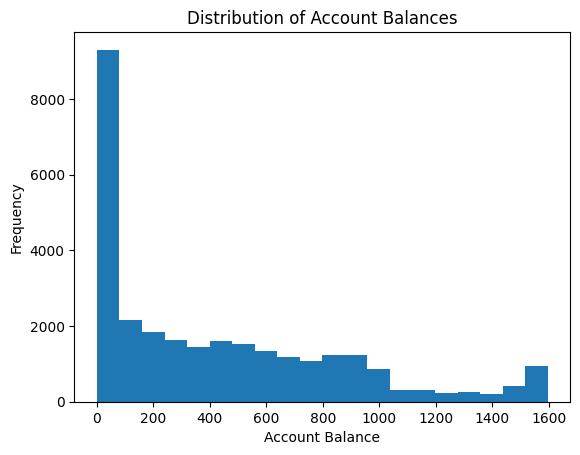

In [60]:
plt.hist(df['Balance'],bins=20)
plt.xlabel('Account Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Account Balances')
plt.show()

In [61]:
balance_threshold = df['Balance'].quantile(0.95)
high_balance_individuals = df[df['Balance'] >= balance_threshold]
high_balance_individuals

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
9,Marcus Rowan,0003-MKNFEA,62,Unmarried,Male,Caucasian,Master,23.672,6164,417,4,1448
30,Godin,0011-IGKFFX,40,Unmarried,Female,Asian,Senior Secondary,77.751,5676,450,3,1448
60,Julietta,0014-BMAQUH,30,Unmarried,Male,Caucasian,Master,41.860,7228,621,5,1474
81,Alexander,0017-DINOCA,46,Married,Male,African American,Bachelor,37.346,5616,404,4,1523
88,Micheline Camp,0017-IUDMW,40,Unmarried,Female,Caucasian,Master,24.729,8605,559,4,1448
...,...,...,...,...,...,...,...,...,...,...,...,...
32369,Rasheeda Garrett,9866-OCCKE,76,Unmarried,Male,Asian,Senior High School,53.930,1233,565,4,1480
32463,Franchesca Gwendolyn,9933-QRGTX,75,Unmarried,Male,African American,Senior High School,29.588,9391,568,1,1549
32490,Honora,9950-MTGYXH,33,Married,Female,African American,Secondary,54.801,10673,523,4,1539
32504,Laraine,9962-BFPDUH,26,Married,Female,Caucasian,Doctorate,101.239,10977,457,1,1587


In [62]:
balance_threshold = df['Balance'].quantile(0.05)
low_balance_individuals = df[df['Balance'] <= balance_threshold]
low_balance_individuals

,Name,CustomerID,Age,Marital Status,Gender,Ethnicity,Education,Income,Limit,Rating,Cards,Balance
7,Carmita,0002-ORFBOZ,25,Married,Female,African American,Bachelor,16.429,2594,120,4,0
16,Micki Link,0004-TLHLJ,64,Unmarried,Male,Caucasian,Bachelor,16.303,1134,130,2,0
21,Ozell,0004-TLHLJW,45,Married,Female,Caucasian,Secondary,75.566,4707,369,1,0
24,Charise Balog,0011-IGKFF,35,Unmarried,Female,Caucasian,Master,20.490,1179,152,5,0
26,Prudence Inez,0011-IGKFFC,56,Married,Male,African American,Bachelor,19.143,2708,168,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32525,Ying Hillary,9975-GPKZU,41,Unmarried,Male,Caucasian,Senior High School,10.645,1841,140,3,0
32527,Keli Holly,9975-SKRNR,63,Unmarried,Female,Caucasian,Senior Secondary,18.596,1580,136,3,0
32535,Shaniqua Howard,9986-BONCE,60,Unmarried,Female,African American,Senior Secondary,69.231,2272,132,3,0
32537,Adina Hubert,9987-LUTYD,75,Married,Male,Caucasian,Master,13.560,1233,167,3,0
